In [66]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

from PIL import Image
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

In [111]:
class MnistNet(nn.Module):
    """
    Liteweight network architecture for the Mnist dataset (digit) classification
    """
    def __init__(self):
        super(MnistNet, self).__init__()
        self.num_classes = 10
        
        # fully convolutional part
        self.features = nn.Sequential(
            nn.Conv2d(1, 4, kernel_size=5),
            nn.MaxPool2d(kernel_size=2),
            nn.ReLU(inplace=True),
            nn.Conv2d(4, 4, kernel_size=5),
            nn.MaxPool2d(kernel_size=2),
            nn.ReLU(inplace=True)            
        )
        
        # classifier, FC layers
        self.classifier = nn.Sequential(
            nn.Linear(16*4,16),
            nn.ReLU(inplace=True),
            nn.Linear(16,self.num_classes)
        )
        
    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x.view(-1,x.size(-3)*x.size(-2)*x.size(-1)))
        return x


def train(model, train_loader, optimizer):
    """
    Training of an epoch
    model: network
    train_loader: train_loader loading images and labels in batches
    optimizer: optimizer to use in the training
    """
    model.train()
    total_loss = 0
    
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad() # zero the accumulated gradients
        output = model(data) # computer network's output
        loss = F.cross_entropy(output, target) # computer the loss
        loss.backward() # backward pass
        optimizer.step() # update weights
        
        total_loss = total_loss + loss.item()
        
        if batch_idx % 100 == 0:
            print('[{}/{} ({:.0f}%)]\tBatch loss: {:.6f}'.format(
                batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()/len(data)))
    
    print('Training: Epoch average loss {:.6f}'.format(total_loss/len(train_loader.dataset)))
         
        
def test(model, val_loader):
    """
    Compute accuracy on the validation set
    model: network
    val_loader: test_loader loading images and labels in batches
    """
    model.eval()
    
    # implement validation procedure, report accuracy on the validation set
    # Accuracy = correct pred / total numb
    correct_pred = 0
    for batch_indx, batch_sample in enumerate(val_loader):
        original_lst, target_lst = batch_sample
        original = original_lst[0]
        target = target_lst[0]
        
        out = model(original.unsqueeze(0))
        
        pred = out[0]
        torch.nonzero(pred, as_tuple=True) # to avoid UserWarning
        pred_class = (pred == max(pred)).nonzero()[0][0]
        
        if pred_class == target:
            correct_pred += 1
    
    accuracy = correct_pred / len(val_loader)
    return accuracy

Sample images


/Users/sofiapetryshyn/opt/anaconda3/lib/python3.7/site-packages/torchvision/datasets/mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


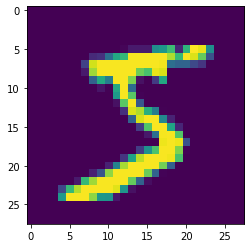

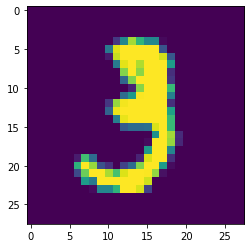

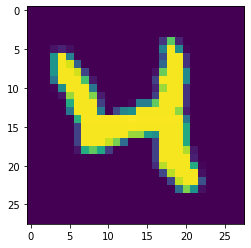

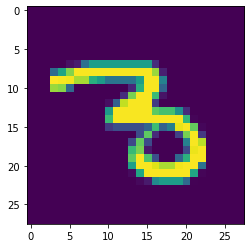

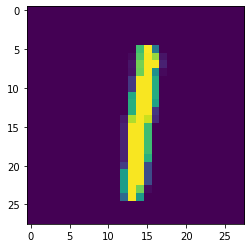

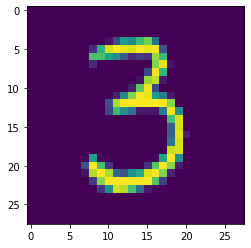

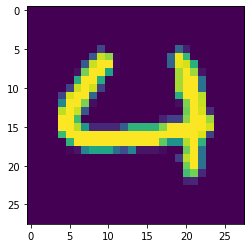

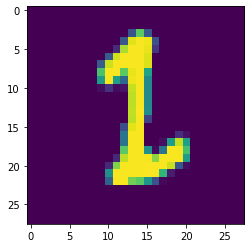

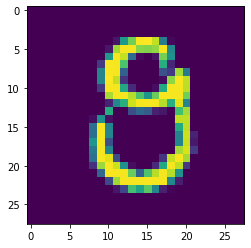

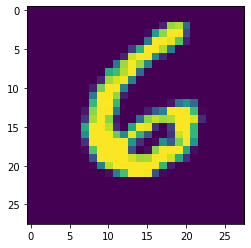

In [77]:
# mnist dataset structure - train part
mnist_dataset_train = datasets.MNIST('vs3ex1data/mnist_data', train=True, transform=transforms.Compose([
                   transforms.ToTensor(),
                   transforms.Normalize((0.1307,), (0.3081,))
               ]))
# mnist dataset structure - test part
mnist_dataset_val = datasets.MNIST('vs3ex1data/mnist_data', train=False, transform=transforms.Compose([
                   transforms.ToTensor(),
                   transforms.Normalize((0.1307,), (0.3081,))
               ]))

# show sample images
print('Sample images')
for i in range(0,100,10):
    plt.imshow(Image.fromarray(mnist_dataset_train.train_data[i].numpy(), mode='L'))
    plt.show()

In [76]:
# loader of the training set
train_loader = torch.utils.data.DataLoader(mnist_dataset_train, batch_size=16, shuffle=True)
# loader of the validation set
val_loader = torch.utils.data.DataLoader(mnist_dataset_val, batch_size=512, shuffle=False)

model = MnistNet() # initialize network structure
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

for epoch in range(1, 20 + 1):
    print('Epoch {}'.format(epoch))
    train(model, train_loader, optimizer)
    acc = test(model, val_loader)
    print('Accuracy {}'.format(acc))


Epoch 1
[0/60000 (0%)]	Batch loss: 0.142991
[1600/60000 (3%)]	Batch loss: 0.061477
[3200/60000 (5%)]	Batch loss: 0.039624
[4800/60000 (8%)]	Batch loss: 0.012333
[6400/60000 (11%)]	Batch loss: 0.042244
[8000/60000 (13%)]	Batch loss: 0.024667
[9600/60000 (16%)]	Batch loss: 0.004895
[11200/60000 (19%)]	Batch loss: 0.006370
[12800/60000 (21%)]	Batch loss: 0.007623
[14400/60000 (24%)]	Batch loss: 0.014258
[16000/60000 (27%)]	Batch loss: 0.004069
[17600/60000 (29%)]	Batch loss: 0.001470
[19200/60000 (32%)]	Batch loss: 0.020781
[20800/60000 (35%)]	Batch loss: 0.010987
[22400/60000 (37%)]	Batch loss: 0.003797
[24000/60000 (40%)]	Batch loss: 0.026298
[25600/60000 (43%)]	Batch loss: 0.022057
[27200/60000 (45%)]	Batch loss: 0.020032
[28800/60000 (48%)]	Batch loss: 0.037471
[30400/60000 (51%)]	Batch loss: 0.000309
[32000/60000 (53%)]	Batch loss: 0.000264
[33600/60000 (56%)]	Batch loss: 0.005207
[35200/60000 (59%)]	Batch loss: 0.002745
[36800/60000 (61%)]	Batch loss: 0.063623
[38400/60000 (64%)]	Ba

[8000/60000 (13%)]	Batch loss: 0.023841
[9600/60000 (16%)]	Batch loss: 0.011234
[11200/60000 (19%)]	Batch loss: 0.008774
[12800/60000 (21%)]	Batch loss: 0.002928
[14400/60000 (24%)]	Batch loss: 0.002272
[16000/60000 (27%)]	Batch loss: 0.000372
[17600/60000 (29%)]	Batch loss: 0.003547
[19200/60000 (32%)]	Batch loss: 0.006065
[20800/60000 (35%)]	Batch loss: 0.002960
[22400/60000 (37%)]	Batch loss: 0.000231
[24000/60000 (40%)]	Batch loss: 0.007564
[25600/60000 (43%)]	Batch loss: 0.002701
[27200/60000 (45%)]	Batch loss: 0.000714
[28800/60000 (48%)]	Batch loss: 0.000875
[30400/60000 (51%)]	Batch loss: 0.002548
[32000/60000 (53%)]	Batch loss: 0.000186
[33600/60000 (56%)]	Batch loss: 0.016010
[35200/60000 (59%)]	Batch loss: 0.011050
[36800/60000 (61%)]	Batch loss: 0.016147
[38400/60000 (64%)]	Batch loss: 0.011385
[40000/60000 (67%)]	Batch loss: 0.010502
[41600/60000 (69%)]	Batch loss: 0.001428
[43200/60000 (72%)]	Batch loss: 0.004888
[44800/60000 (75%)]	Batch loss: 0.000264
[46400/60000 (77%)

[16000/60000 (27%)]	Batch loss: 0.000142
[17600/60000 (29%)]	Batch loss: 0.001240
[19200/60000 (32%)]	Batch loss: 0.000538
[20800/60000 (35%)]	Batch loss: 0.005411
[22400/60000 (37%)]	Batch loss: 0.000143
[24000/60000 (40%)]	Batch loss: 0.017197
[25600/60000 (43%)]	Batch loss: 0.002573
[27200/60000 (45%)]	Batch loss: 0.017970
[28800/60000 (48%)]	Batch loss: 0.002466
[30400/60000 (51%)]	Batch loss: 0.002594
[32000/60000 (53%)]	Batch loss: 0.000684
[33600/60000 (56%)]	Batch loss: 0.015584
[35200/60000 (59%)]	Batch loss: 0.007743
[36800/60000 (61%)]	Batch loss: 0.000946
[38400/60000 (64%)]	Batch loss: 0.023117
[40000/60000 (67%)]	Batch loss: 0.000138
[41600/60000 (69%)]	Batch loss: 0.000634
[43200/60000 (72%)]	Batch loss: 0.001870
[44800/60000 (75%)]	Batch loss: 0.001230
[46400/60000 (77%)]	Batch loss: 0.001120
[48000/60000 (80%)]	Batch loss: 0.000318
[49600/60000 (83%)]	Batch loss: 0.000360
[51200/60000 (85%)]	Batch loss: 0.008504
[52800/60000 (88%)]	Batch loss: 0.005801
[54400/60000 (91

[24000/60000 (40%)]	Batch loss: 0.022989
[25600/60000 (43%)]	Batch loss: 0.017773
[27200/60000 (45%)]	Batch loss: 0.005262
[28800/60000 (48%)]	Batch loss: 0.000179
[30400/60000 (51%)]	Batch loss: 0.000160
[32000/60000 (53%)]	Batch loss: 0.034556
[33600/60000 (56%)]	Batch loss: 0.006201
[35200/60000 (59%)]	Batch loss: 0.010656
[36800/60000 (61%)]	Batch loss: 0.000460
[38400/60000 (64%)]	Batch loss: 0.000143
[40000/60000 (67%)]	Batch loss: 0.000592
[41600/60000 (69%)]	Batch loss: 0.000113
[43200/60000 (72%)]	Batch loss: 0.000136
[44800/60000 (75%)]	Batch loss: 0.001080
[46400/60000 (77%)]	Batch loss: 0.000529
[48000/60000 (80%)]	Batch loss: 0.007356
[49600/60000 (83%)]	Batch loss: 0.001141
[51200/60000 (85%)]	Batch loss: 0.000430
[52800/60000 (88%)]	Batch loss: 0.003147
[54400/60000 (91%)]	Batch loss: 0.010381
[56000/60000 (93%)]	Batch loss: 0.000017
[57600/60000 (96%)]	Batch loss: 0.018013
[59200/60000 (99%)]	Batch loss: 0.004805
Training: Epoch average loss 0.006647
Accuracy 1.0
Epoch 

In [108]:
class MnistNet_(nn.Module):
    """
    Liteweight network architecture for the Mnist dataset (digit) classification
    """
    def __init__(self):
        super(MnistNet_, self).__init__()
        self.num_classes = 10
        
        # fully convolutional part
        self.features = nn.Sequential(
            nn.Conv2d(1, 4, kernel_size=5),
            nn.BatchNorm2d(4),
            nn.MaxPool2d(kernel_size=2),
            nn.ReLU(inplace=True),
            nn.Conv2d(4, 4, kernel_size=5),
            nn.MaxPool2d(kernel_size=2),
            nn.ReLU(inplace=True)            
        )
        
        # classifier, FC layers
        self.classifier = nn.Sequential(
            nn.Linear(16*4,16),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5)
        )
        
    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x.view(-1,x.size(-3)*x.size(-2)*x.size(-1)))
        return x


def train(model, train_loader, optimizer):
    """
    Training of an epoch
    model: network
    train_loader: train_loader loading images and labels in batches
    optimizer: optimizer to use in the training
    """
    model.train()
    total_loss = 0
    
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad() # zero the accumulated gradients
        output = model(data) # computer network's output
        loss = F.cross_entropy(output, target) # computer the loss
        loss.backward() # backward pass
        optimizer.step() # update weights
        
        total_loss = total_loss + loss.item()
        
        if batch_idx % 100 == 0:
            print('[{}/{} ({:.0f}%)]\tBatch loss: {:.6f}'.format(
                batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()/len(data)))
    
    print('Training: Epoch average loss {:.6f}'.format(total_loss/len(train_loader.dataset)))
         
        
def test(model, val_loader):
    """
    Compute accuracy on the validation set
    model: network
    val_loader: test_loader loading images and labels in batches
    """
    model.eval()
    
    # implement validation procedure, report accuracy on the validation set
    # Accuracy = correct pred / total numb
    correct_pred = 0
    for batch_indx, batch_sample in enumerate(val_loader):
        original_lst, target_lst = batch_sample
        original = original_lst[0]
        target = target_lst[0]
        
        out = model(original.unsqueeze(0))
        
        pred = out[0]
        torch.nonzero(pred, as_tuple=True) # to avoid UserWarning
        pred_class = (pred == max(pred)).nonzero()[0][0]
        
        if pred_class == target:
            correct_pred += 1
    
    accuracy = correct_pred / len(val_loader)
    return accuracy

In [110]:
# loader of the training set
train_loader = torch.utils.data.DataLoader(mnist_dataset_train, batch_size=16, shuffle=True)
# loader of the validation set
val_loader = torch.utils.data.DataLoader(mnist_dataset_val, batch_size=512, shuffle=False)

model = MnistNet_() # initialize network structure
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

for epoch in range(1, 20 + 1):
    print('Epoch {}'.format(epoch))
    train(model, train_loader, optimizer)
    acc = test(model, val_loader)
    print('Accuracy {}'.format(acc))

Epoch 1
[0/60000 (0%)]	Batch loss: 0.178842
[1600/60000 (3%)]	Batch loss: 0.130625
[3200/60000 (5%)]	Batch loss: 0.111399
[4800/60000 (8%)]	Batch loss: 0.138376
[6400/60000 (11%)]	Batch loss: 0.114634
[8000/60000 (13%)]	Batch loss: 0.127694
[9600/60000 (16%)]	Batch loss: 0.163886
[11200/60000 (19%)]	Batch loss: 0.134333
[12800/60000 (21%)]	Batch loss: 0.151458
[14400/60000 (24%)]	Batch loss: 0.155473
[16000/60000 (27%)]	Batch loss: 0.125522
[17600/60000 (29%)]	Batch loss: 0.125394
[19200/60000 (32%)]	Batch loss: 0.130876
[20800/60000 (35%)]	Batch loss: 0.148394
[22400/60000 (37%)]	Batch loss: 0.122518
[24000/60000 (40%)]	Batch loss: 0.139554
[25600/60000 (43%)]	Batch loss: 0.107297
[27200/60000 (45%)]	Batch loss: 0.151886
[28800/60000 (48%)]	Batch loss: 0.104709
[30400/60000 (51%)]	Batch loss: 0.094621
[32000/60000 (53%)]	Batch loss: 0.108245
[33600/60000 (56%)]	Batch loss: 0.147623
[35200/60000 (59%)]	Batch loss: 0.112185
[36800/60000 (61%)]	Batch loss: 0.081309
[38400/60000 (64%)]	Ba

[6400/60000 (11%)]	Batch loss: 0.086764
[8000/60000 (13%)]	Batch loss: 0.083470
[9600/60000 (16%)]	Batch loss: 0.141929
[11200/60000 (19%)]	Batch loss: 0.130527
[12800/60000 (21%)]	Batch loss: 0.144638
[14400/60000 (24%)]	Batch loss: 0.066273
[16000/60000 (27%)]	Batch loss: 0.120201
[17600/60000 (29%)]	Batch loss: 0.093441
[19200/60000 (32%)]	Batch loss: 0.101531
[20800/60000 (35%)]	Batch loss: 0.077547
[22400/60000 (37%)]	Batch loss: 0.099777
[24000/60000 (40%)]	Batch loss: 0.101112
[25600/60000 (43%)]	Batch loss: 0.109564
[27200/60000 (45%)]	Batch loss: 0.068251
[28800/60000 (48%)]	Batch loss: 0.086313
[30400/60000 (51%)]	Batch loss: 0.099667
[32000/60000 (53%)]	Batch loss: 0.110168
[33600/60000 (56%)]	Batch loss: 0.119442
[35200/60000 (59%)]	Batch loss: 0.098017
[36800/60000 (61%)]	Batch loss: 0.109532
[38400/60000 (64%)]	Batch loss: 0.110756
[40000/60000 (67%)]	Batch loss: 0.074106
[41600/60000 (69%)]	Batch loss: 0.106455
[43200/60000 (72%)]	Batch loss: 0.149759
[44800/60000 (75%)]

[12800/60000 (21%)]	Batch loss: 0.145381
[14400/60000 (24%)]	Batch loss: 0.111366
[16000/60000 (27%)]	Batch loss: 0.086873
[17600/60000 (29%)]	Batch loss: 0.077090
[19200/60000 (32%)]	Batch loss: 0.119738
[20800/60000 (35%)]	Batch loss: 0.098240
[22400/60000 (37%)]	Batch loss: 0.130501
[24000/60000 (40%)]	Batch loss: 0.089445
[25600/60000 (43%)]	Batch loss: 0.097508
[27200/60000 (45%)]	Batch loss: 0.086866
[28800/60000 (48%)]	Batch loss: 0.108327
[30400/60000 (51%)]	Batch loss: 0.075849
[32000/60000 (53%)]	Batch loss: 0.119553
[33600/60000 (56%)]	Batch loss: 0.110398
[35200/60000 (59%)]	Batch loss: 0.131345
[36800/60000 (61%)]	Batch loss: 0.133735
[38400/60000 (64%)]	Batch loss: 0.074152
[40000/60000 (67%)]	Batch loss: 0.114222
[41600/60000 (69%)]	Batch loss: 0.076991
[43200/60000 (72%)]	Batch loss: 0.109325
[44800/60000 (75%)]	Batch loss: 0.087630
[46400/60000 (77%)]	Batch loss: 0.119928
[48000/60000 (80%)]	Batch loss: 0.099007
[49600/60000 (83%)]	Batch loss: 0.111693
[51200/60000 (85

[19200/60000 (32%)]	Batch loss: 0.086970
[20800/60000 (35%)]	Batch loss: 0.097989
[22400/60000 (37%)]	Batch loss: 0.110704
[24000/60000 (40%)]	Batch loss: 0.098154
[25600/60000 (43%)]	Batch loss: 0.097747
[27200/60000 (45%)]	Batch loss: 0.086671
[28800/60000 (48%)]	Batch loss: 0.097500
[30400/60000 (51%)]	Batch loss: 0.121136
[32000/60000 (53%)]	Batch loss: 0.122125
[33600/60000 (56%)]	Batch loss: 0.065310
[35200/60000 (59%)]	Batch loss: 0.163529
[36800/60000 (61%)]	Batch loss: 0.091404
[38400/60000 (64%)]	Batch loss: 0.085705
[40000/60000 (67%)]	Batch loss: 0.165449
[41600/60000 (69%)]	Batch loss: 0.087156
[43200/60000 (72%)]	Batch loss: 0.109606
[44800/60000 (75%)]	Batch loss: 0.119941
[46400/60000 (77%)]	Batch loss: 0.121727
[48000/60000 (80%)]	Batch loss: 0.133180
[49600/60000 (83%)]	Batch loss: 0.120523
[51200/60000 (85%)]	Batch loss: 0.089942
[52800/60000 (88%)]	Batch loss: 0.108567
[54400/60000 (91%)]	Batch loss: 0.090502
[56000/60000 (93%)]	Batch loss: 0.098809
[57600/60000 (96